# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

19

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
## To save the demand and for troubleshooting, I am only calling 20 cities right now

In [27]:
cities

['bredasdorp',
 'general roca',
 'punta arenas',
 'georgetown',
 'avarua',
 'rikitea',
 'bluff',
 'cape town',
 'tuatapere',
 'boda',
 'jalingo',
 'vila velha',
 'dawson creek',
 'ossora',
 'barsovo',
 'lampa',
 'singapore',
 'saint-philippe',
 'kapaa']

In [28]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + 'appid=' + weather_api_key + '&q='

In [29]:
response = requests.get(query_url + 'thompson').json()
print(response)

{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 269.15, 'feels_like': 263.14, 'temp_min': 269.15, 'temp_max': 269.15, 'pressure': 1025, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 350, 'gust': 8.75}, 'clouds': {'all': 90}, 'dt': 1618886148, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1618830926, 'sunset': 1618883104}, 'timezone': -18000, 'id': 6165406, 'name': 'Thompson', 'cod': 200}


In [30]:
cities2 = ['Las Vegas', 'Divide', 'Colorado Springs']
lat = []
lon = []
maxtemp = []
humidity = []
clouds = []
wind = []
country = []
dt = []
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod']!=200:
        cities.remove(city)
        print('Error ' + city)
    else:
        print(city)
        lat.append(response['coord']['lat'])
        print(lat)
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
    

bredasdorp
[-34.5322]
general roca
[-34.5322, -39.0333]
punta arenas
[-34.5322, -39.0333, -53.15]
georgetown
[-34.5322, -39.0333, -53.15, 5.4112]
avarua
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078]
rikitea
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203]
bluff
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6]
cape town
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258]
tuatapere
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258, -46.1333]
boda
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258, -46.1333, 4.3189]
jalingo
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258, -46.1333, 4.3189, 8.8833]
vila velha
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258, -46.1333, 4.3189, 8.8833, -20.3297]
dawson creek
[-34.5322, -39.0333, -53.15, 5.4112, -21.2078, -23.1203, -46.6, -33.9258, -46.1333, 4.3189, 8.8833, -20.3297, 55.7666]
ossora
[-34.5322, -39.0333, -

In [31]:
print(str(len(cities)) + " " + str(len(lon)))

19 19


In [32]:
print(cities)

['bredasdorp', 'general roca', 'punta arenas', 'georgetown', 'avarua', 'rikitea', 'bluff', 'cape town', 'tuatapere', 'boda', 'jalingo', 'vila velha', 'dawson creek', 'ossora', 'barsovo', 'lampa', 'singapore', 'saint-philippe', 'kapaa']


In [33]:
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Long": lon,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,287.15,82,33,5.66,ZA,1618886183
1,general roca,-39.0333,-67.5833,297.15,59,100,7.23,AR,1618886070
2,punta arenas,-53.1500,-70.9167,280.15,70,20,7.20,CL,1618885926
3,georgetown,5.4112,100.3354,303.15,79,20,0.51,MY,1618886139
4,avarua,-21.2078,-159.7750,300.15,69,75,4.12,CK,1618886338
5,rikitea,-23.1203,-134.9692,298.85,71,4,3.64,PF,1618886339
6,bluff,-46.6000,168.3333,293.15,52,1,2.68,NZ,1618886340
7,cape town,-33.9258,18.4232,289.26,77,0,3.60,ZA,1618886226
8,tuatapere,-46.1333,167.6833,293.15,52,18,2.68,NZ,1618886341
9,boda,4.3189,17.4695,294.25,90,96,1.27,CF,1618886342


In [35]:
weather_data.to_csv(output_data_file)

In [14]:
weather_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01
mean,17.036344,-5.172306,283.082222,75.388889,56.388889,3.094444,1.618785e+09
std,46.654230,113.185488,14.374648,20.219789,40.630529,1.602495,1.503071e+02
min,-46.600000,-175.200000,248.370000,31.000000,0.000000,0.850000,1.618784e+09
25%,-31.052900,-94.792000,278.347500,74.500000,11.750000,2.097500,1.618785e+09
50%,40.781150,7.563600,287.590000,82.500000,74.000000,3.225000,1.618785e+09
75%,58.159625,67.121300,291.005000,88.000000,93.000000,3.990000,1.618785e+09
max,73.506900,168.864300,300.150000,100.000000,100.000000,6.170000,1.618785e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_data = weather_data[weather_data['Humidity']<100]
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.2820,-126.8329,282.15,43,1,2.57,CA,1618785042
1,mataura,-46.1927,168.8643,287.59,85,94,0.89,NZ,1618785043
2,chuy,-33.6971,-53.4616,290.57,78,0,3.38,UY,1618785043
3,cape town,-33.9258,18.4232,293.15,88,0,5.66,ZA,1618784404
4,rikitea,-23.1203,-134.9692,298.60,76,9,4.20,PF,1618785044
5,northview,43.0456,-85.6006,288.15,31,75,5.14,US,1618785044
7,thompson,55.7435,-97.8558,272.15,37,20,6.17,CA,1618785045
8,stromness,58.9650,-3.2960,282.15,81,90,2.06,GB,1618785045
9,ocnita,44.9833,25.5500,277.59,88,100,1.27,RO,1618785046
10,tilichiki,60.4667,166.1000,272.14,89,100,0.85,RU,1618784991


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:xlabel='Lat', ylabel='Max Temp'>

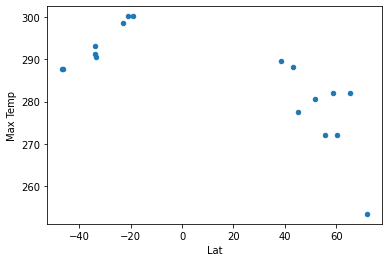

In [16]:
weather_data.plot(x='Lat', y='Max Temp', kind='scatter')

## Latitude vs. Humidity Plot

<AxesSubplot:xlabel='Lat', ylabel='Humidity'>

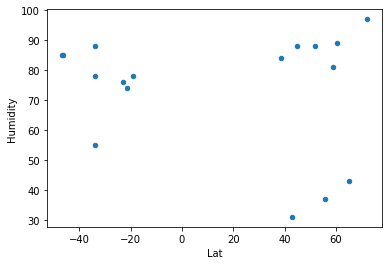

In [17]:
weather_data.plot(x='Lat', y='Humidity', kind='scatter')

## Latitude vs. Cloudiness Plot

<AxesSubplot:xlabel='Lat', ylabel='Cloudiness'>

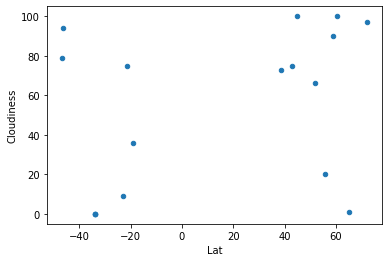

In [18]:
weather_data.plot(x='Lat', y='Cloudiness', kind='scatter')

## Latitude vs. Wind Speed Plot

<AxesSubplot:xlabel='Lat', ylabel='Wind Speed'>

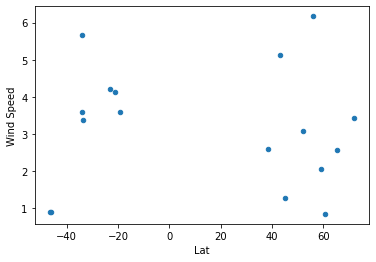

In [19]:
weather_data.plot(x='Lat', y='Wind Speed', kind='scatter')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
nhW = weather_data[(weather_data['Lat']>0)]
print(nhW)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nhW['Max Temp'], nhW['Lat'])
regress_values = nhW['Lat'] * slope + intercept
print(regress_values)
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
print(line_eq)

              City      Lat      Long  Max Temp  Humidity  Cloudiness  \
0     norman wells  65.2820 -126.8329    282.15        43           1   
5        northview  43.0456  -85.6006    288.15        31          75   
7         thompson  55.7435  -97.8558    272.15        37          20   
8        stromness  58.9650   -3.2960    282.15        81          90   
9           ocnita  44.9833   25.5500    277.59        88         100   
10       tilichiki  60.4667  166.1000    272.14        89         100   
13          stolin  51.8912   26.8460    280.62        88          66   
14  ribeira grande  38.5167  -28.7000    289.70        84          73   
16        khatanga  71.9667  102.5000    253.51        97          97   

    Wind Speed Country        Date  
0         2.57      CA  1618785042  
5         5.14      US  1618785044  
7         6.17      CA  1618785045  
8         2.06      GB  1618785045  
9         1.27      RO  1618785046  
10        0.85      RU  1618784991  
13        

0.5567736149899225


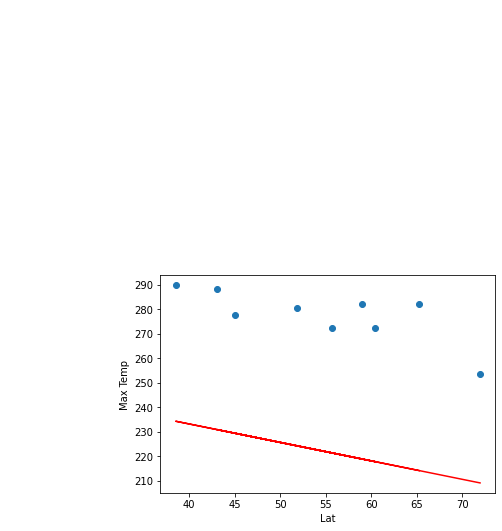

In [21]:
x_values = nhW['Lat']
y_values = nhW['Max Temp']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

            City      Lat      Long  Max Temp  Humidity  Cloudiness  \
9          vaini -21.2000 -175.2000    300.15        74          75   
11         bluff -46.6000  168.3333    287.04        87          77   
12        atuona  -9.8000 -139.0333    300.08        77           9   
13   new norfolk -42.7826  147.0587    287.04        76         100   
14        hobart -42.8794  147.3294    287.04        67          75   
16     cape town -33.9258   18.4232    293.15        94           0   
17  constitucion -35.3333  -72.4167    287.89        76          76   

    Wind Speed Country        Date  
9         4.12      TO  1618783805  
11        1.34      NZ  1618783845  
12        8.11      PF  1618783186  
13        0.45      AU  1618783932  
14        3.60      AU  1618783680  
16        4.63      ZA  1618783120  
17        2.59      CL  1618783933  
9    -673.260217
11   -725.204780
12   -649.946515
13   -717.397962
14   -717.595924
16   -699.285261
17   -702.163685
Name: Lat, dtype

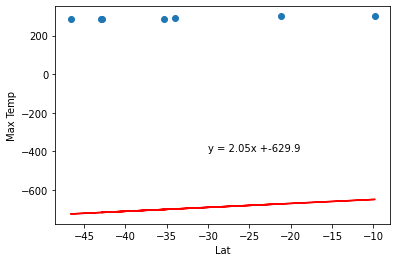

In [48]:
shW = weather_data[(weather_data['Lat']<0)]
print(shW)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shW['Max Temp'], shW['Lat'])
regress_values = shW['Lat'] * slope + intercept
print(regress_values)
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
print(line_eq)
x_values = shW['Lat']
y_values = shW['Max Temp']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-30,-400))
print(rvalue **2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.00925270265335115


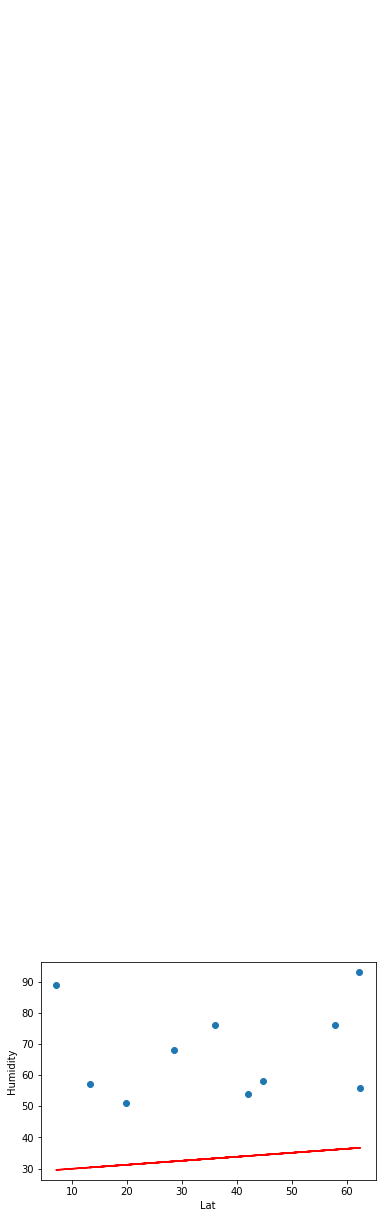

In [55]:
nhW = weather_data[(weather_data['Lat']>0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nhW['Humidity'], nhW['Lat'])
regress_values = nhW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = nhW['Lat']
y_values = nhW['Humidity']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.01064813855016369


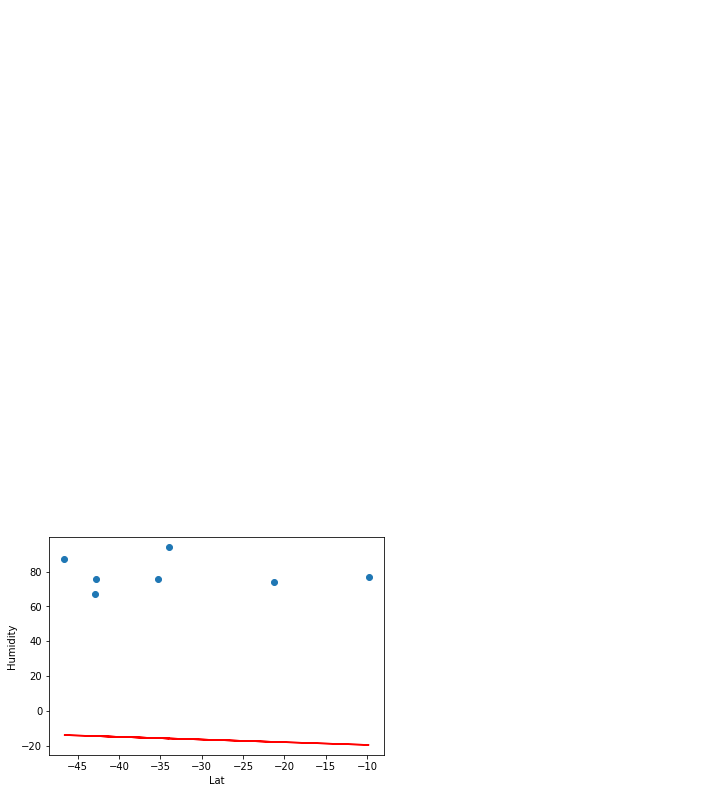

In [56]:
shW = weather_data[(weather_data['Lat']<0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shW['Humidity'], shW['Lat'])
regress_values = shW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = shW['Lat']
y_values = shW['Humidity']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.03953739371204862


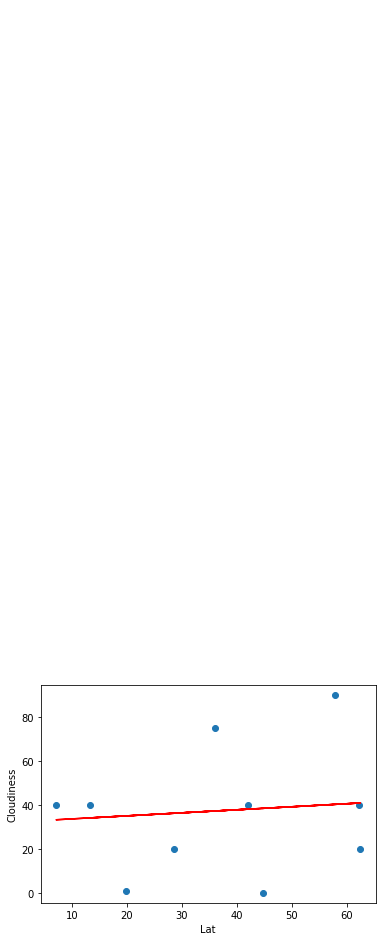

In [57]:
nhW = weather_data[(weather_data['Lat']>0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nhW['Cloudiness'], nhW['Lat'])
regress_values = nhW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = nhW['Lat']
y_values = nhW['Cloudiness']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.3321935037770656


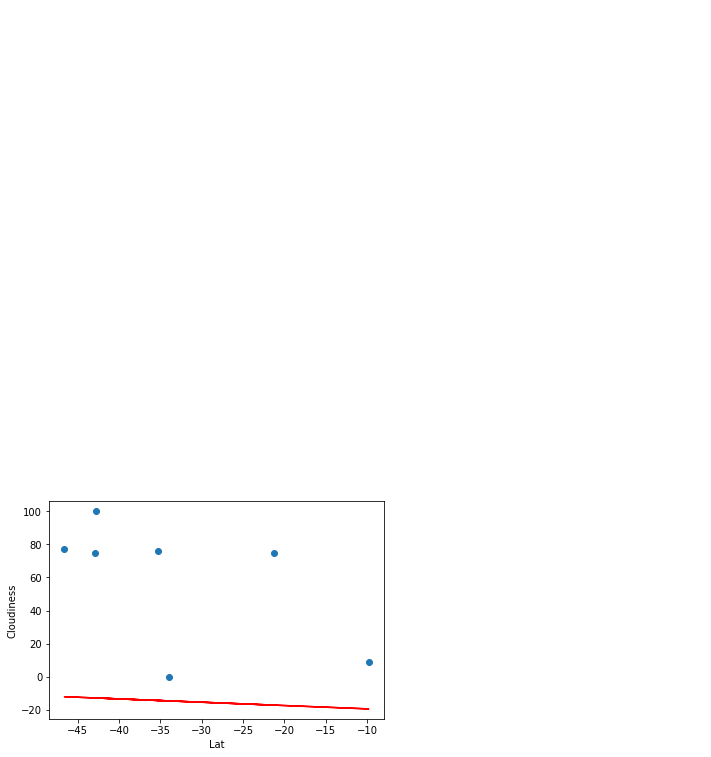

In [58]:
shW = weather_data[(weather_data['Lat']<0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shW['Cloudiness'], shW['Lat'])
regress_values = shW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = shW['Lat']
y_values = shW['Cloudiness']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.06943015161241362


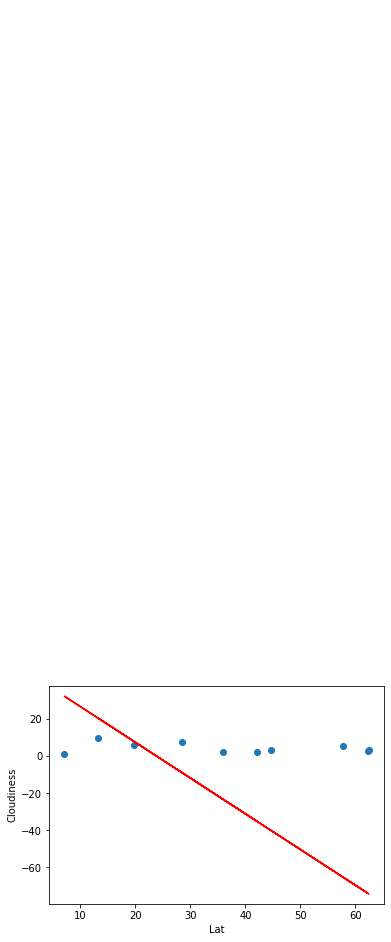

In [59]:
nhW = weather_data[(weather_data['Lat']>0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nhW['Wind Speed'], nhW['Lat'])
regress_values = nhW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = nhW['Lat']
y_values = nhW['Wind Speed']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (20,400))
print(rvalue **2)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.753244161405427


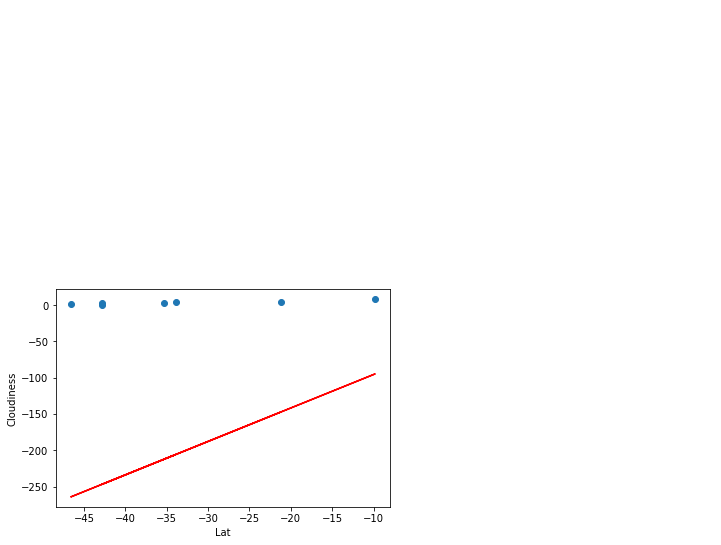

In [60]:
shW = weather_data[(weather_data['Lat']<0)]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shW['Wind Speed'], shW['Lat'])
regress_values = shW['Lat'] * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
x_values = shW['Lat']
y_values = shW['Wind Speed']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (20,400))
print(rvalue **2)